In [1]:
#import sys;sys.path.append('../src/')

In [3]:
from guigen import Application, time_manager
import numpy as np
import pandas as pd

class Furiko:
    def __init__(self):
        self.theta_0 = np.pi / 4 # 初期の角度
        self.marker_size = 12
        self.start_time = time_manager.now()
        
        self.app = Application(
            calculator_main=self.main,
            calculator_dt=50,
            visualizer_dt=10,
        )
        
        self.app.button(self.random)
        self.app.add_figure('furiko', self.init_anim, self.update_anim)
        
        self.app.start()
        
    def random(self):
        self.im.set_color(np.random.rand(3,))
        
    def main(self):
        seconds = (time_manager.now() - self.start_time) / pd.Timedelta(1, 's')
        bpm = self.app.get_float('bpm', 30, 200, 1)
        self.g = 1.62 if self.app.get_bool("apply lunar gravity") else 9.8   # 重力加速度
        self.T = round(1 / (bpm / 60), 2) # BPを取得し、周期の計算
        self.l = (self.T ** 2) * self.g / (4 * np.pi ** 2)  # 振り子の長さを計算
        self.omega = np.sqrt(self.g / self.l)  # 角速度
        self.theta = self.theta_0 * np.cos(self.omega * seconds) # 角度を計算
        self.x = self.l * np.sin(self.theta) # おもりのx座標
        self.y = - self.l * np.cos(self.theta) # おもりのy座標
        
    def init_anim(self, ax):
        '''アニメーション初期化用の関数'''
        ax.set_xlim(-1.2,1.2)
        ax.set_ylim(-1.2,1.2)
        self.x = 0
        self.y = 0
        self.theta = 0
        self.im, = ax.plot([], [], color='k', marker='o', markersize=int(self.marker_size), linestyle='None')
        self.line, = ax.plot([], [], color='k')
        return self.im, self.line

    def update_anim(self, dt, ax):
        '''グラフ更新関数'''
        self.im.set_data(self.x, self.y)
        self.line.set_data([0, np.sin(self.theta)], [0, -np.cos(self.theta)])
        return self.im, self.line

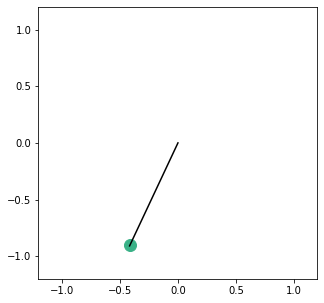

In [4]:
furiko = Furiko()